In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/synthetic_dataset_with_dates.csv')

In [3]:
df.head(10)

,Category_A,Category_B,Sales,Quantity_Sold,Discount_Percentage,Category_C,Profit,Date
0,Clothing,East,336,11,39.159921,New,16,2023-08-01
1,Clothing,West,877,28,39.097999,Returning,285,2023-08-01
2,Electronics,South,419,8,25.031213,New,163,2023-08-01
3,Furniture,South,548,45,12.076842,New,17,2023-08-01
4,Clothing,North,902,21,30.281894,VIP,593,2023-08-01
5,Furniture,West,182,30,44.520476,Returning,23,2023-08-02
6,Furniture,East,620,32,30.680206,New,95,2023-08-02
7,Clothing,South,592,43,12.450437,New,-66,2023-08-03
8,Electronics,West,786,44,49.057187,VIP,542,2023-08-03
9,Furniture,South,383,25,47.571491,Returning,198,2023-08-03


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

,0
Category_A,0
Category_B,0
Sales,0
Quantity_Sold,0
Discount_Percentage,0
Category_C,0
Profit,0
Date,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category_A           1000 non-null   object 
 1   Category_B           1000 non-null   object 
 2   Sales                1000 non-null   int64  
 3   Quantity_Sold        1000 non-null   int64  
 4   Discount_Percentage  1000 non-null   float64
 5   Category_C           1000 non-null   object 
 6   Profit               1000 non-null   int64  
 7   Date                 1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


In [8]:
df.describe()

,Sales,Quantity_Sold,Discount_Percentage,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,548.571000,25.954000,24.879203,168.273000
std,257.555485,14.249102,14.443098,309.590605
min,100.000000,1.000000,0.000582,-547.000000
25%,335.750000,14.000000,12.628825,-59.750000
50%,551.500000,26.000000,24.910888,168.000000
75%,768.250000,38.000000,37.418149,392.000000
max,1000.000000,50.000000,49.891043,931.000000


In [9]:
# Converting datetime format
df['Date']=pd.to_datetime(df['Date'])

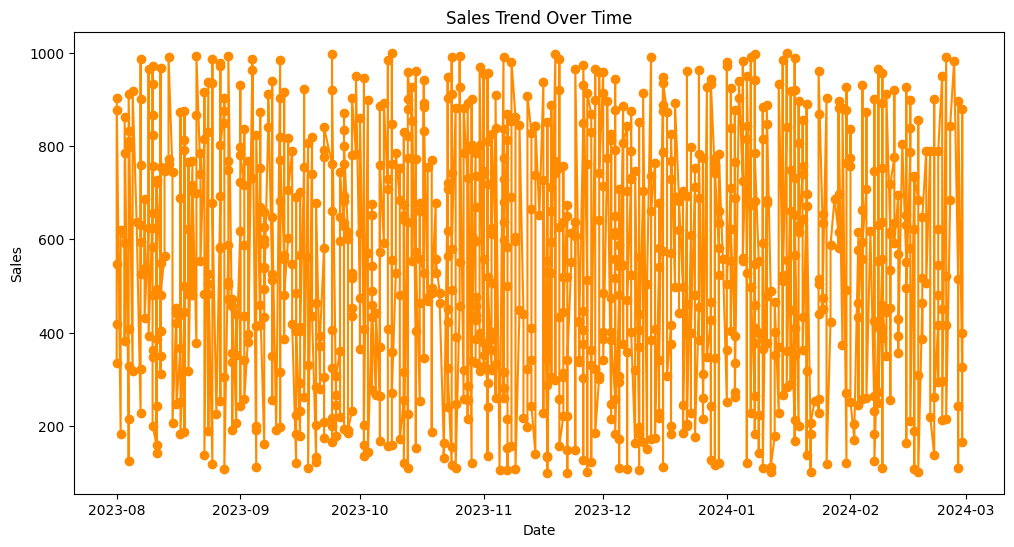

In [10]:
# Sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales'], marker='o', linestyle='-', color='Darkorange')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

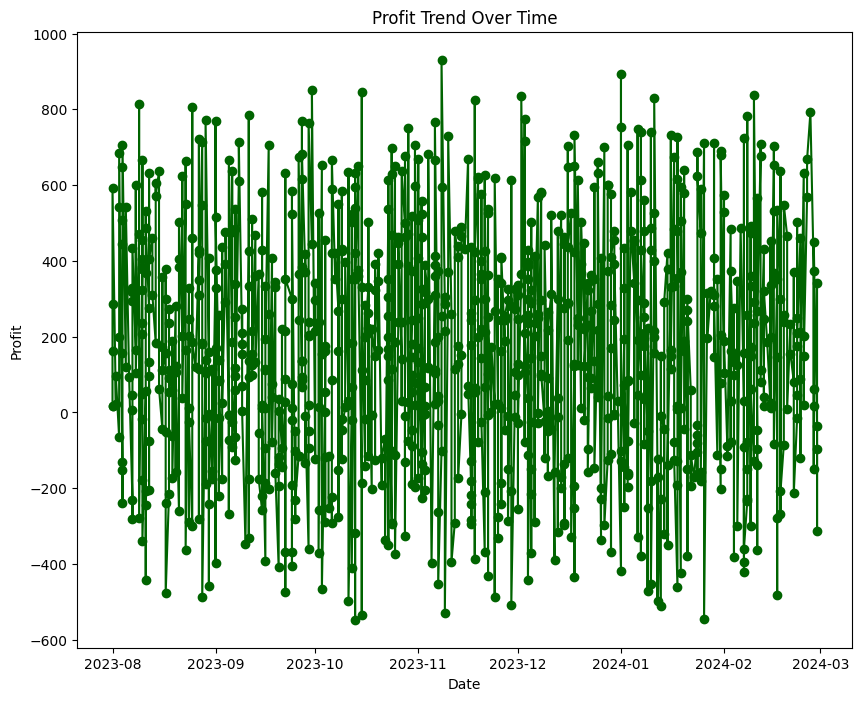

In [11]:
# Profit trend overtime
plt.figure(figsize=(10,8))
plt.plot(df['Date'], df['Profit'], marker='o', linestyle='-', color='Darkgreen')
plt.title('Profit Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

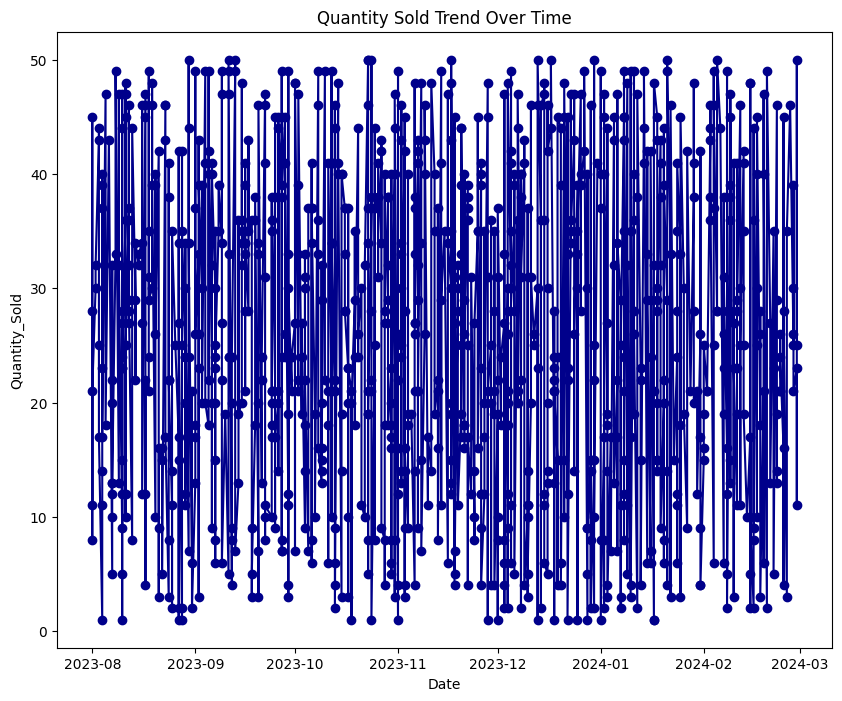

In [12]:
# Quantity sold trend overtime
plt.figure(figsize=(10,8))
plt.plot(df['Date'], df['Quantity_Sold'], marker='o', linestyle='-', color='Darkblue')
plt.title('Quantity Sold Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity_Sold')
plt.show()

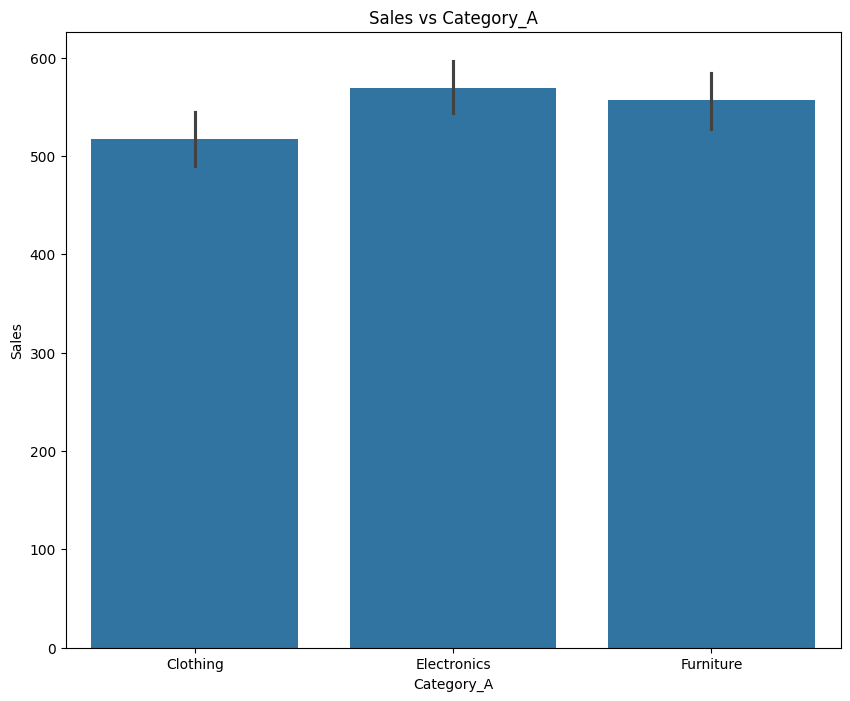

In [13]:
# Category-wise analysis (sales vs category_A)
plt.figure(figsize=(10,8))
sns.barplot(x='Category_A', y='Sales', data=df)
plt.title('Sales vs Category_A')
plt.xlabel('Category_A')
plt.ylabel('Sales')
plt.show()

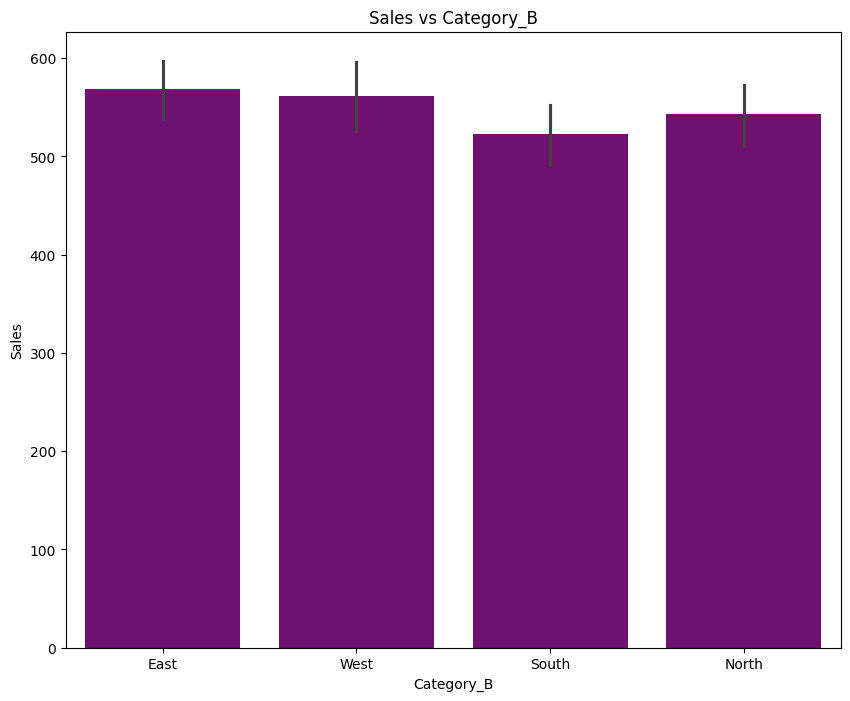

In [14]:
# Sales vs Category_B
plt.figure(figsize=(10,8))
sns.barplot(x='Category_B', y='Sales', color='purple', data=df)
plt.title('Sales vs Category_B')
plt.xlabel('Category_B')
plt.ylabel('Sales')
plt.show()

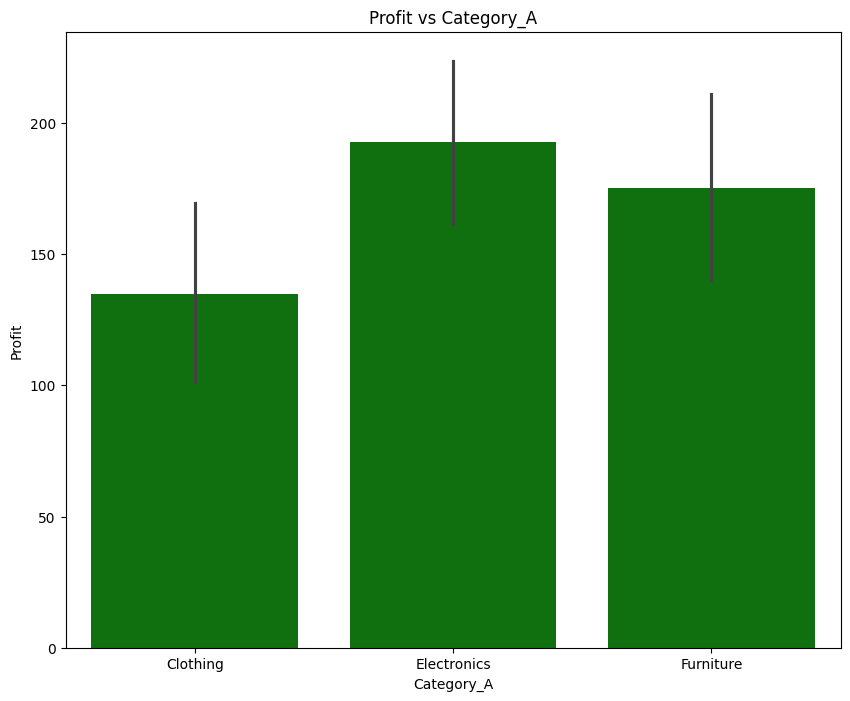

In [15]:
# Profit vs Category_A
plt.figure(figsize=(10,8))
sns.barplot(x='Category_A', y='Profit', color='green', data=df)
plt.title('Profit vs Category_A')
plt.xlabel('Category_A')
plt.ylabel('Profit')
plt.show()

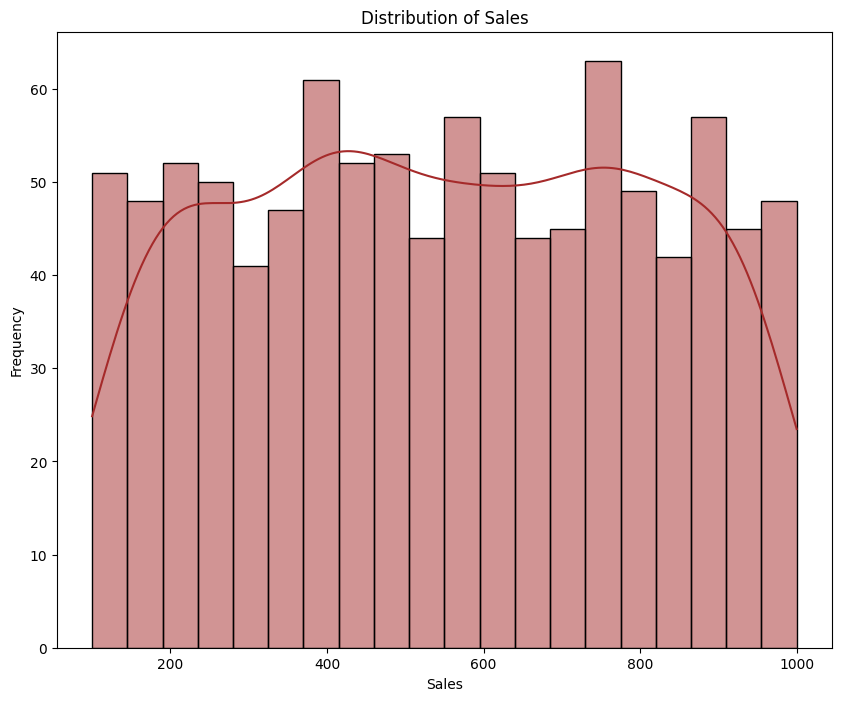

In [16]:
# Sales distribution
plt.figure(figsize=(10,8))
sns.histplot(df['Sales'], bins=20, kde=True, color='brown')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

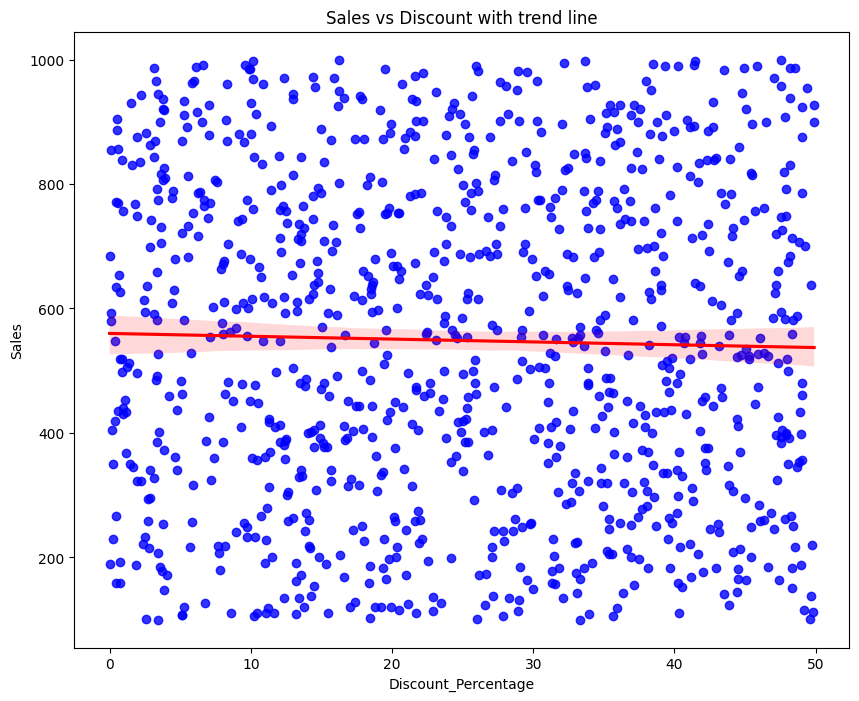

In [17]:
# Sales vs discount
plt.figure(figsize=(10,8))
sns.regplot(x='Discount_Percentage', y='Sales', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'}) # Added data=df
plt.title('Sales vs Discount with trend line')
plt.xlabel('Discount_Percentage')
plt.ylabel('Sales')
plt.show()

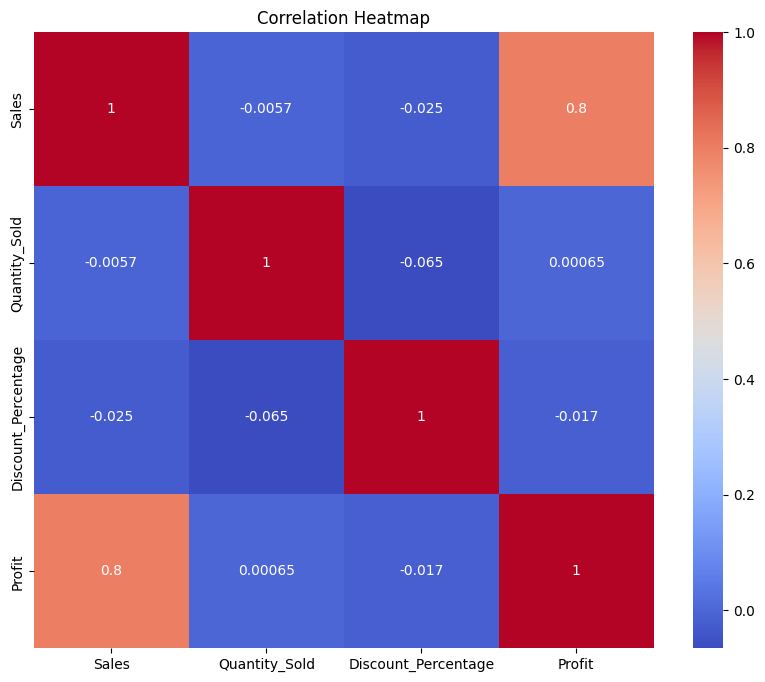

In [18]:
# Correlation heatmap
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

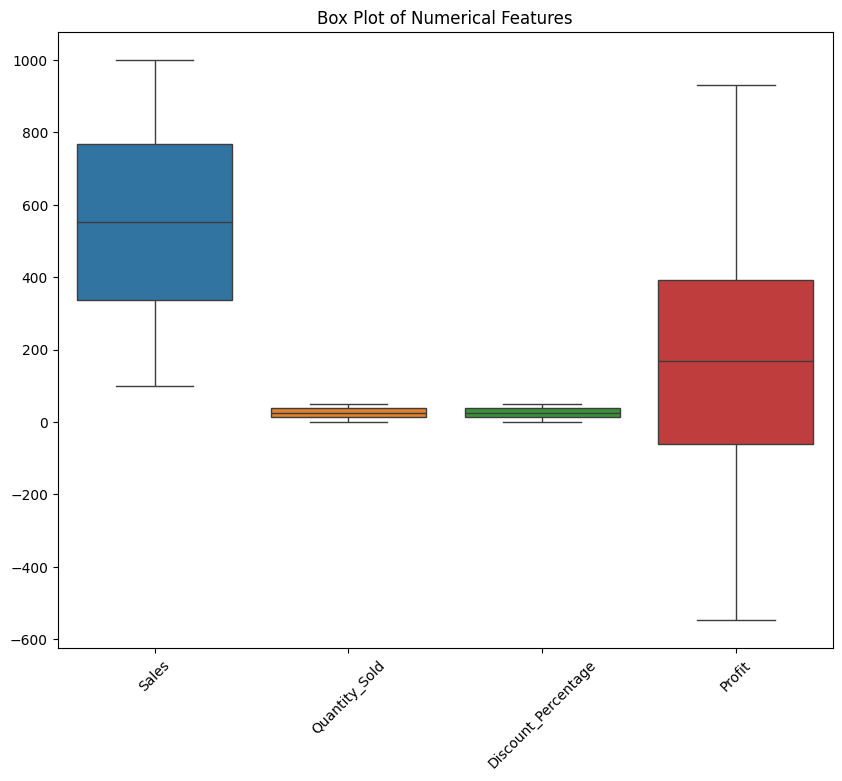

In [19]:
# Checking outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Printing Outliers per feature
for feature in numerical_features:
  Q1=df[feature].quantile(0.25)
  Q3=df[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.0*IQR
  upper_bound=Q3+1.0*IQR
  outliers=df[(df[feature]<lower_bound) | (df[feature]>upper_bound)]
  print(f"Outliers in {feature}:")
  print(outliers)
  print("\n")

Outliers in Sales:
Empty DataFrame
Columns: [Category_A, Category_B, Sales, Quantity_Sold, Discount_Percentage, Category_C, Profit, Date]
Index: []


Outliers in Quantity_Sold:
Empty DataFrame
Columns: [Category_A, Category_B, Sales, Quantity_Sold, Discount_Percentage, Category_C, Profit, Date]
Index: []


Outliers in Discount_Percentage:
Empty DataFrame
Columns: [Category_A, Category_B, Sales, Quantity_Sold, Discount_Percentage, Category_C, Profit, Date]
Index: []


Outliers in Profit:
      Category_A Category_B  Sales  Quantity_Sold  Discount_Percentage  \
286  Electronics       East    950             24            16.264757   
342     Clothing      South    111              9             8.584695   
353     Clothing      South    152             40            40.543929   
355    Furniture      South    961             19            20.682134   
486    Furniture       West    981              7            26.072982   
490     Clothing       East    107             46             5.

In [21]:
# Converting categorical to numerical
df=pd.get_dummies(df, columns=['Category_A', 'Category_B', 'Category_C'])

In [22]:
df.head()

,Sales,Quantity_Sold,Discount_Percentage,Profit,Date,Category_A_Clothing,Category_A_Electronics,Category_A_Furniture,Category_B_East,Category_B_North,Category_B_South,Category_B_West,Category_C_New,Category_C_Returning,Category_C_VIP
0,336,11,39.159921,16,2023-08-01,True,False,False,True,False,False,False,True,False,False
1,877,28,39.097999,285,2023-08-01,True,False,False,False,False,False,True,False,True,False
2,419,8,25.031213,163,2023-08-01,False,True,False,False,False,True,False,True,False,False
3,548,45,12.076842,17,2023-08-01,False,False,True,False,False,True,False,True,False,False
4,902,21,30.281894,593,2023-08-01,True,False,False,False,True,False,False,False,False,True


In [23]:
df.columns

Index(['Sales', 'Quantity_Sold', 'Discount_Percentage', 'Profit', 'Date',
       'Category_A_Clothing', 'Category_A_Electronics', 'Category_A_Furniture',
       'Category_B_East', 'Category_B_North', 'Category_B_South',
       'Category_B_West', 'Category_C_New', 'Category_C_Returning',
       'Category_C_VIP'],
      dtype='object')

In [24]:
df.shape

(1000, 15)

In [25]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Sales', 'Profit', 'Quantity_Sold', 'Discount_Percentage']] = scaler.fit_transform(df[['Sales', 'Profit', 'Quantity_Sold', 'Discount_Percentage']])

In [26]:
df.tail()

,Sales,Quantity_Sold,Discount_Percentage,Profit,Date,Category_A_Clothing,Category_A_Electronics,Category_A_Furniture,Category_B_East,Category_B_North,Category_B_South,Category_B_West,Category_C_New,Category_C_Returning,Category_C_VIP
995,0.884444,0.408163,0.911440,0.675237,2024-02-28,False,False,True,False,False,True,False,False,True,False
996,0.251111,0.448980,0.343188,0.345061,2024-02-29,False,True,False,False,False,True,False,False,False,True
997,0.333333,0.204082,0.281610,0.304465,2024-02-29,False,True,False,False,False,False,True,False,False,True
998,0.072222,1.000000,0.892084,0.158322,2024-02-29,False,False,True,False,False,False,True,False,True,False
999,0.866667,0.489796,0.767216,0.601488,2024-02-29,False,False,True,True,False,False,False,False,True,False


In [27]:
# Converting Date to useful features (Feature engineering)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Is_Weekend'] = df['Date'].dt.dayofweek >= 5

In [28]:
# Lag features for trend capturing
# Assuming 'Quantity_Sold' represents demand
df['demand_Lag_1'] = df['Quantity_Sold'].shift(1)
df['demand_Lag_2'] = df['Quantity_Sold'].shift(2)
df['demand_Lag_3'] = df['Quantity_Sold'].shift(3)

In [29]:
df.isna().sum()

,0
Sales,0
Quantity_Sold,0
Discount_Percentage,0
Profit,0
Date,0
Category_A_Clothing,0
Category_A_Electronics,0
Category_A_Furniture,0
Category_B_East,0
Category_B_North,0


In [30]:
df['demand_Lag_1'].fillna(0, inplace=True)
df['demand_Lag_2'].fillna(0, inplace=True)
df['demand_Lag_3'].fillna(0, inplace=True)

In [31]:
df.dtypes

,0
Sales,float64
Quantity_Sold,float64
Discount_Percentage,float64
Profit,float64
Date,datetime64[ns]
Category_A_Clothing,bool
Category_A_Electronics,bool
Category_A_Furniture,bool
Category_B_East,bool
Category_B_North,bool


In [32]:
# Converting Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')

In [33]:
# Selecting features and target variable
feature=['Sales', 'Profit', 'Quantity_Sold', 'Discount_Percentage', 'Year', 'Month', 'Day', 'Day_of_Week', 'Is_Weekend', 'demand_Lag_1', 'demand_Lag_2', 'demand_Lag_3', 'Category_A_Clothing', 'Category_A_Electronics', 'Category_A_Furniture', 'Category_B_East', 'Category_B_North', 'Category_B_South', 'Category_B_West', 'Category_C_New', 'Category_C_Returning', 'Category_C_VIP']
target=['Quantity_Sold']

In [34]:
X=df[feature].values
y=df[target].values

In [35]:
# Train test spliting(20% for testing)
from sklearn.model_selection import train_test_split
train_size=int(len(df)*0.8)
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]

In [36]:
# Data reshaping for LSTM
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [37]:
# Convert relevant columns to numeric type
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Building model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

history=model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 0.1329 - val_loss: 0.0975
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0964 - val_loss: 0.0848
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0928 - val_loss: 0.0848
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0899 - val_loss: 0.0860
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0890 - val_loss: 0.0878
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0904 - val_loss: 0.0846
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0865 - val_loss: 0.0852
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0856 - val_loss: 0.0844
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0906 - val_loss: 0.0892
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0916 - val_loss: 0.0851
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0883 - val_loss: 0.0890
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/st

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
# Making predictions
y_pred = model.predict(X_test)

y_pred = y_pred.reshape(-1, 1)
y_pred = y_pred[:len(y_test)]

# Now calculating the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Mean Squared Error (MSE): 0.0007108668796718121
Mean Absolute Error (MAE): 0.02014515921473503
R-squared (R2): 0.9915522336959839
Root Mean Squared Error (RMSE): 0.026662086933918208


In [40]:
!pip install scikeras

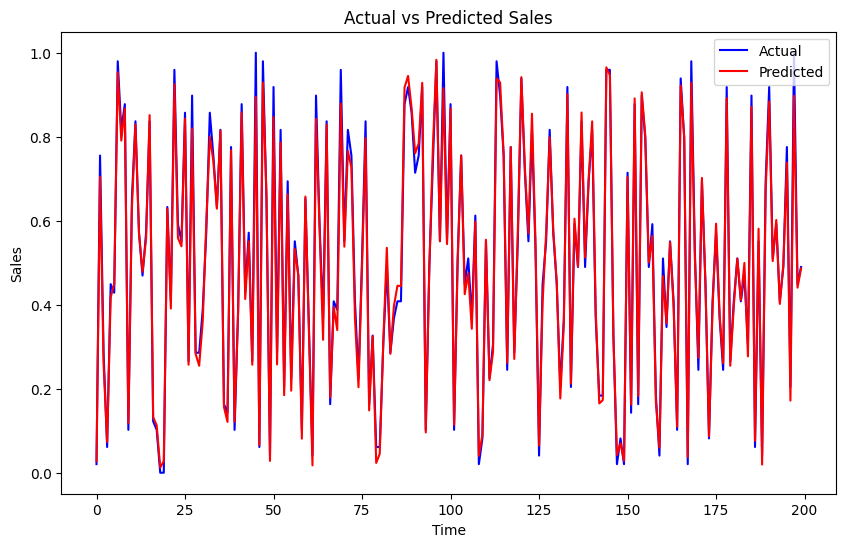

In [41]:
 # Comparing actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [42]:
# Future demand predictions
future_data = X_test[-10:]
future_pred = model.predict(future_data)
print("Future Predictions:", future_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Future Predictions: [[0.88382584]
 [0.5037084 ]
 [0.60176015]
 [0.40184066]
 [0.49592724]
 [0.73786515]
 [0.17175601]
 [0.897373  ]
 [0.44065616]
 [0.4864239 ]]


In [43]:
# Finding high demand products
category_columns = [col for col in df.columns if col.startswith("Category_A_") or
                    col.startswith("Category_B_") or col.startswith("Category_C_")]


demand_summary = df[category_columns + ["Quantity_Sold"]].groupby(category_columns).sum().reset_index()

demand_summary = demand_summary.sort_values(by="Quantity_Sold", ascending=False)

print(demand_summary.head(10))


    Category_A_Clothing  Category_A_Electronics  Category_A_Furniture  \
23                False                    True                 False   
15                False                    True                 False   
31                 True                   False                 False   
21                False                    True                 False   
30                 True                   False                 False   
1                 False                   False                  True   
0                 False                   False                  True   
13                False                    True                 False   
9                 False                   False                  True   
17                False                    True                 False   

    Category_B_East  Category_B_North  Category_B_South  Category_B_West  \
23             True             False             False            False   
15            False             False       

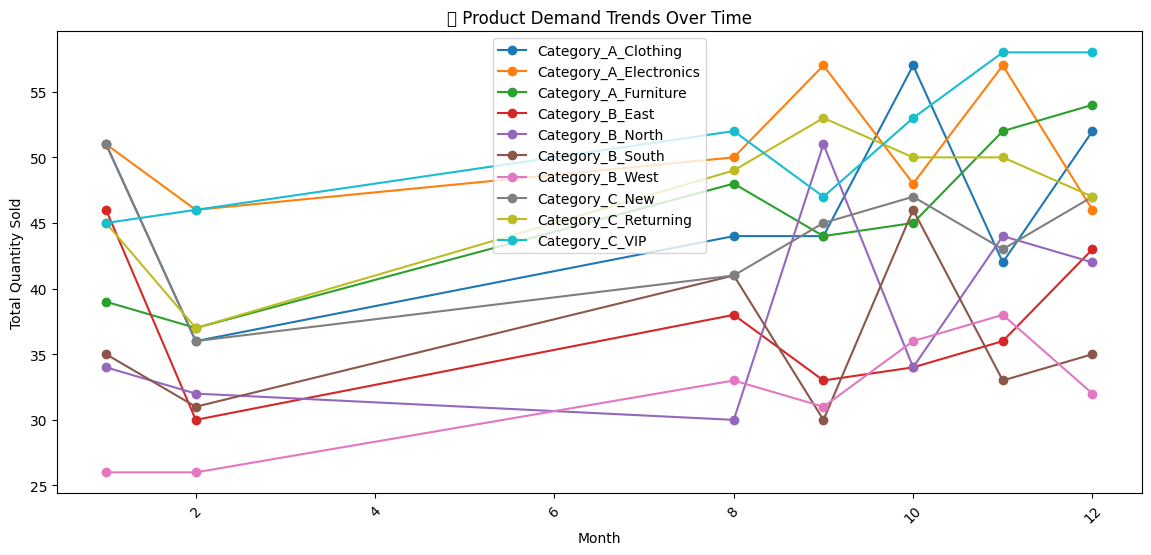

In [44]:
# Time series trend analysis
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month  # Changed to get month as an integer

trend_analysis = df.groupby("Month")[category_columns + ["Quantity_Sold"]].sum().reset_index()


plt.figure(figsize=(14, 6))
for col in category_columns:
    plt.plot(trend_analysis["Month"], trend_analysis[col], marker="o", label=col)

plt.title("📊 Product Demand Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [45]:
df.columns

Index(['Sales', 'Quantity_Sold', 'Discount_Percentage', 'Profit', 'Date',
       'Category_A_Clothing', 'Category_A_Electronics', 'Category_A_Furniture',
       'Category_B_East', 'Category_B_North', 'Category_B_South',
       'Category_B_West', 'Category_C_New', 'Category_C_Returning',
       'Category_C_VIP', 'Year', 'Month', 'Day', 'Day_of_Week', 'Is_Weekend',
       'demand_Lag_1', 'demand_Lag_2', 'demand_Lag_3'],
      dtype='object')

In [46]:
# High demanding products
df["Product_Label"] = df.apply(lambda row: f"{'Clothing' if row['Category_A_Clothing'] else ''} "
                                           f"{'Electronics' if row['Category_A_Electronics'] else ''} "
                                           f"{'Furniture' if row['Category_A_Furniture'] else ''} | "
                                           f"{'East' if row['Category_B_East'] else ''} "
                                           f"{'North' if row['Category_B_North'] else ''} "
                                           f"{'South' if row['Category_B_South'] else ''} "
                                           f"{'West' if row['Category_B_West'] else ''} | "
                                           f"{'New' if row['Category_C_New'] else ''} "
                                           f"{'Returning' if row['Category_C_Returning'] else ''} "
                                           f"{'VIP' if row['Category_C_VIP'] else ''}".strip(), axis=1)

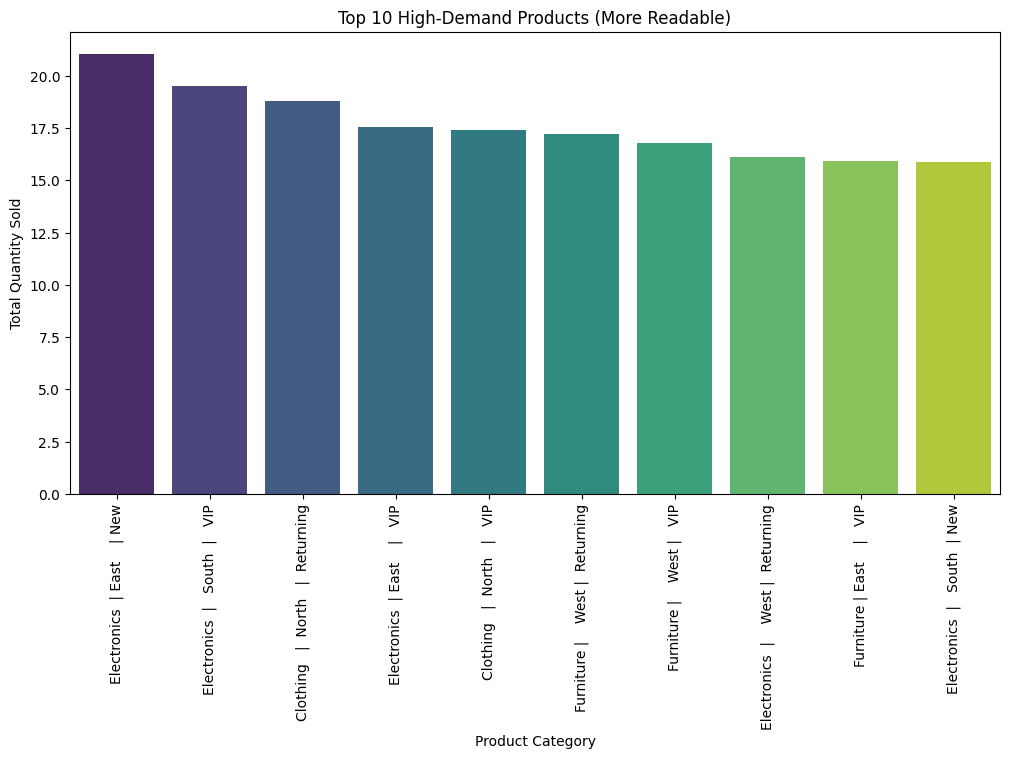

,Product_Label,Quantity_Sold
23,Electronics | East | New,21.061224
15,Electronics | South | VIP,19.530612
7,Clothing | North | Returning,18.795918
21,Electronics | East | VIP,17.571429
6,Clothing | North | VIP,17.428571
25,Furniture | West | Returning,17.204082
24,Furniture | West | VIP,16.795918
13,Electronics | West | Returning,16.142857
33,Furniture | East | VIP,15.918367
17,Electronics | South | New,15.897959


In [47]:
top_demand_products = df.groupby('Product_Label')['Quantity_Sold'].sum().reset_index()
top_demand_products = top_demand_products.sort_values(by='Quantity_Sold', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_demand_products, x="Product_Label", y="Quantity_Sold", palette="viridis")
plt.xticks(rotation=90)
plt.title("Top 10 High-Demand Products (More Readable)")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.show()


top_demand_products